## Tensorflow

In [1]:
import tensorflow as tf

tensorflow is a tensor and autodif library.
It's similar to pytorch. The main difference is that tensorflow has terrible API.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

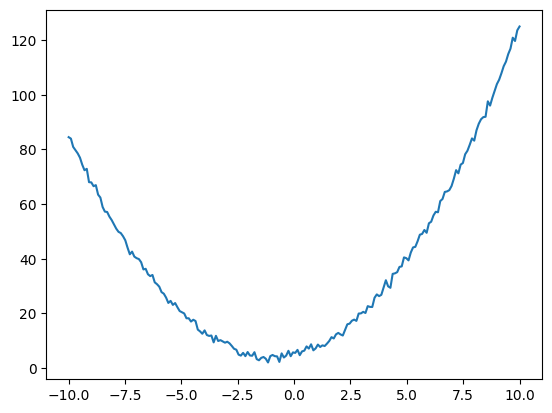

In [15]:
def gen_kinda_quadratic_data():
    xs = tf.linspace(-10.0, 10.0, 200)  # like numpy.linspace
    ys = xs ** 2 + 2 * xs + 5 + tf.random.normal(shape=[200])
    return xs, ys


plt.plot(*gen_kinda_quadratic_data());

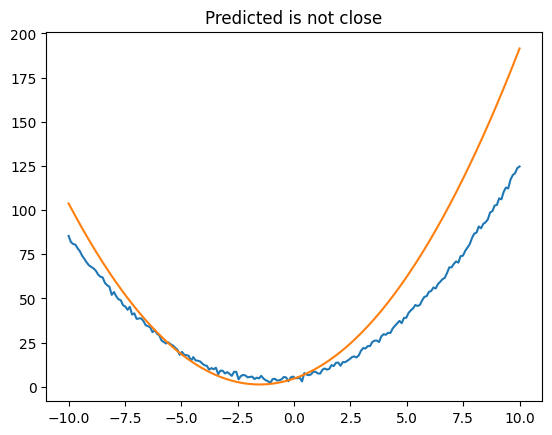

In [39]:
class Model(tf.Module):
    def __init__(self):
        super().__init__()
        # model that learns quadratic function
        rand_init = tf.random.uniform(shape=[3], minval=0.0, maxval=5.0, seed=22)
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b =  tf.Variable(rand_init[2])
        
    @tf.function
    def __call__(self, x):
        return self.w_q * (x ** 2) + self.w_l * x + self.b
    
    
def plot_initial_model():
    model = Model()
    xs, ys = gen_kinda_quadratic_data()
    plt.plot(xs, ys, label='Initial data')
    plt.plot(xs, model(xs), label='Predicted data')
    plt.title('Predicted is not close')
    plt.show()

    
plot_initial_model()

Let's train a model so prediction will be close

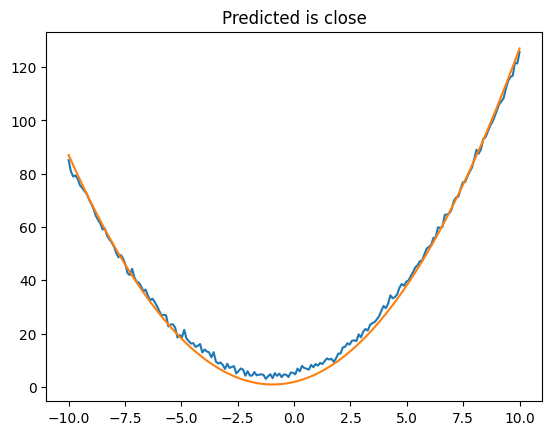

In [46]:
def loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))


def train_and_plot():
    model = Model()
    # classic SGD but with incredibly involved and unintuitive API
    xs, ys = gen_kinda_quadratic_data()
    dataset = tf.data.Dataset.from_tensor_slices((xs, ys))
    dataset = dataset.shuffle(buffer_size=xs.shape[0]).batch(32)
    
    num_epochs = 300
    learning_rate = 1e-4
    
    for epoch in range(num_epochs):
        for xs_batch, ys_batch in dataset:
            with tf.GradientTape() as tape:
                batch_loss = loss(model(xs_batch), ys_batch)
            grads = tape.gradient(batch_loss, model.variables)
            for g, v in zip(grads, model.variables):
                # learning step, assign_sum is -=
                v.assign_sub(learning_rate * g)
    plt.plot(xs, ys, label='Initial data')
    plt.plot(xs, model(xs), label='Predicted data')
    plt.title('Predicted is close')
    plt.show()
    
    
train_and_plot()
                